#Restaurant Reviews Mining
Find insights into what can be improved based on restaurant reviews

In [ ]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 27.0 MB/

In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
import string as s
from sklearn.feature_extraction.text import TfidfVectorizer
import sys
np.set_printoptions(threshold=sys.maxsize)
from wordcloud import WordCloud
from simpletransformers.classification import ClassificationModel
from collections import Counter
from google.colab import drive
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install summa
from summa import keywords

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54388 sha256=3b7541343221027c4ef80b61a2575d618756a0cacd989efc3d0d0035cf39998b
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
Successfully built summa


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
rev = pd.read_excel('/content/gdrive/MyDrive/TextMiningDatasets/Restaurant_Reviews.xlsx')
rev

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
rev.dtypes

Review    object
Liked      int64
dtype: object

In [ ]:
rev.isna().sum()

Review    0
Liked     0
dtype: int64

In [ ]:
rev['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

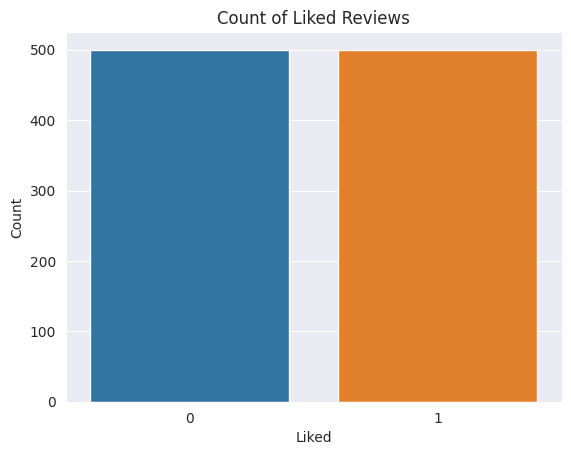

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='Liked', data=rev)
plt.title('Count of Liked Reviews')
plt.xlabel('Liked')
plt.ylabel('Count')
plt.show()

In [ ]:
rev.groupby('Liked').describe()

Review                                    
       count unique                     top freq
Liked                                           
0        500    497  The food was terrible.    2
1        500    499      I love this place.    2

In [ ]:
X=rev.Review
X

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

##Tokenize

In [ ]:
def tokenization(text):
    lst=text.split()
    return lst
X=X.apply(tokenization)
print(X)

0                          [Wow..., Loved, this, place.]
1                                [Crust, is, not, good.]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                         [Appetite, instantly, gone.]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming,, ...
999    [Then,, as, if, I, hadn't, wasted, enough, of,...
Name: Review, Length: 1000, dtype: object


##Remove Stopwords

In [ ]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i.lower() not in stop:
            new_lst.append(i)
    return new_lst
X=X.apply(remove_stopwords)
print(X)

0                                [Wow..., Loved, place.]
1                                         [Crust, good.]
2                               [tasty, texture, nasty.]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4                      [selection, menu, great, prices.]
                             ...                        
995             [think, food, flavor, texture, lacking.]
996                         [Appetite, instantly, gone.]
997               [Overall, impressed, would, go, back.]
998    [whole, experience, underwhelming,, think, we'...
999    [Then,, wasted, enough, life, there,, poured, ...
Name: Review, Length: 1000, dtype: object


##Convert to lowercase

In [ ]:
def lowercase_conversion(lst):
    new_lst=[]
    for i in lst:
        i=i.lower()
        new_lst.append(i)
    return new_lst
X=X.apply(lowercase_conversion)
print(X)

0                                [wow..., loved, place.]
1                                         [crust, good.]
2                               [tasty, texture, nasty.]
3      [stopped, late, may, bank, holiday, rick, stev...
4                      [selection, menu, great, prices.]
                             ...                        
995             [think, food, flavor, texture, lacking.]
996                         [appetite, instantly, gone.]
997               [overall, impressed, would, go, back.]
998    [whole, experience, underwhelming,, think, we'...
999    [then,, wasted, enough, life, there,, poured, ...
Name: Review, Length: 1000, dtype: object


##Remove numbers

In [ ]:
def number_removal(lst):
    nonum_lst=[]
    new_lst=[]
    for i in lst:
        for j in s.digits:
            i=i.replace(j,'')
        nonum_lst.append(i)
    for i in nonum_lst:
        if i!='':
            new_lst.append(i)
    return new_lst
X=X.apply(number_removal)
print(X)

0                                [wow..., loved, place.]
1                                         [crust, good.]
2                               [tasty, texture, nasty.]
3      [stopped, late, may, bank, holiday, rick, stev...
4                      [selection, menu, great, prices.]
                             ...                        
995             [think, food, flavor, texture, lacking.]
996                         [appetite, instantly, gone.]
997               [overall, impressed, would, go, back.]
998    [whole, experience, underwhelming,, think, we'...
999    [then,, wasted, enough, life, there,, poured, ...
Name: Review, Length: 1000, dtype: object


##Remove punctuation

In [ ]:
def remove_punctuation(lst):
    new_lst=[]
    for i in lst:
        for j in s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
X=X.apply(remove_punctuation)
print(X)

0                                    [wow, loved, place]
1                                          [crust, good]
2                                [tasty, texture, nasty]
3      [stopped, late, may, bank, holiday, rick, stev...
4                       [selection, menu, great, prices]
                             ...                        
995              [think, food, flavor, texture, lacking]
996                          [appetite, instantly, gone]
997                [overall, impressed, would, go, back]
998    [whole, experience, underwhelming, think, well...
999    [then, wasted, enough, life, there, poured, sa...
Name: Review, Length: 1000, dtype: object


##Remove additional space

In [ ]:
def remove_space(lst):
    new_lst=[]
    for i in lst:
        i=i.strip()
        new_lst.append(i)
    return new_lst
X=X.apply(remove_space)
print(X)

0                                    [wow, loved, place]
1                                          [crust, good]
2                                [tasty, texture, nasty]
3      [stopped, late, may, bank, holiday, rick, stev...
4                       [selection, menu, great, prices]
                             ...                        
995              [think, food, flavor, texture, lacking]
996                          [appetite, instantly, gone]
997                [overall, impressed, would, go, back]
998    [whole, experience, underwhelming, think, well...
999    [then, wasted, enough, life, there, poured, sa...
Name: Review, Length: 1000, dtype: object


##Lemmatize

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
X=X.apply(lemmatize)
print(X)

0                                    [wow, loved, place]
1                                          [crust, good]
2                                [tasty, texture, nasty]
3      [stopped, late, may, bank, holiday, rick, stev...
4                        [selection, menu, great, price]
                             ...                        
995              [think, food, flavor, texture, lacking]
996                          [appetite, instantly, gone]
997                [overall, impressed, would, go, back]
998    [whole, experience, underwhelming, think, well...
999    [then, wasted, enough, life, there, poured, sa...
Name: Review, Length: 1000, dtype: object


In [ ]:
X= X.apply(lemmatize).apply(lambda x: ' '.join(x))
print(X)

0                                        wow loved place
1                                             crust good
2                                    tasty texture nasty
3      stopped late may bank holiday rick steve recom...
4                             selection menu great price
                             ...                        
995                    think food flavor texture lacking
996                              appetite instantly gone
997                      overall impressed would go back
998    whole experience underwhelming think well go n...
999    then wasted enough life there poured salt woun...
Name: Review, Length: 1000, dtype: object


In [ ]:
new_rev = pd.DataFrame({
    'Review': X,
    'Liked': rev['Liked']
})
new_rev

,Review,Liked
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great price,1
...,...,...
995,think food flavor texture lacking,0
996,appetite instantly gone,0
997,overall impressed would go back,0
998,whole experience underwhelming think well go n...,0


##Length Analysis

In [ ]:
rev['Length'] = rev['Review'].apply(len)
rev

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [ ]:
rev.Length.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [ ]:
rev_149 =rev[rev['Length'] == 149]['Review']


for message in rev_149:
    print(message)

The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rev_11 =rev[rev['Length'] == 11]['Review']


for message in rev_11:
    print(message)

DELICIOUS!!
I LOVED it!
Over rated.
Great food.
Both great!


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

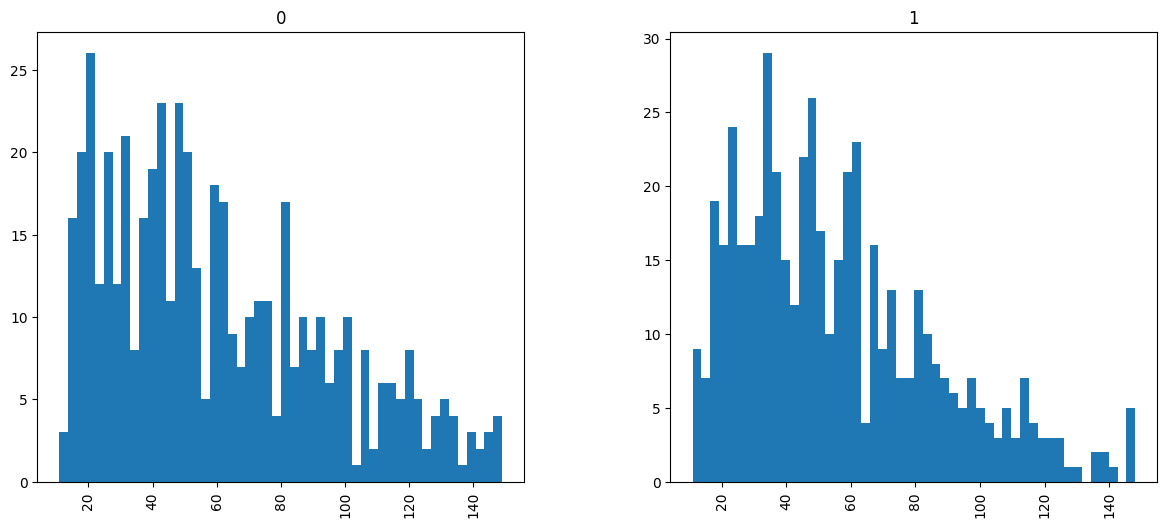

In [ ]:
rev.hist(column='Length', by='Liked', bins=50, figsize=(14,6))

In [ ]:
rev.corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-91-d50665b45027>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rev.corr()


,Liked,Length
Liked,1.000000,-0.075285
Length,-0.075285,1.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-92-387b6f4b79b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rev.corr(), annot=True)


<Axes: >

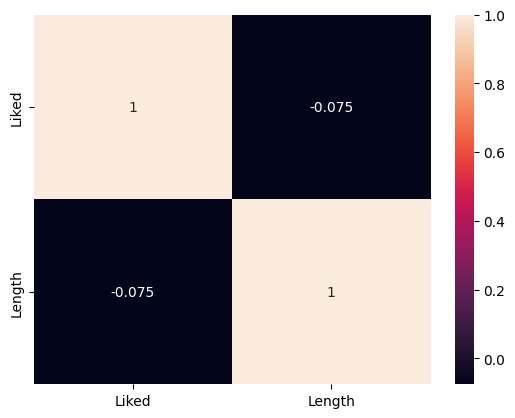

In [ ]:
sns.heatmap(rev.corr(), annot=True)

##Frequent words in all reviews

In [ ]:
all_messages = ' '.join(new_rev['Review'])

words = all_messages.split()
word_counts = Counter(words)

most_common_words = word_counts.most_common(50)

print("Most Common Words in All Reviews:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most Common Words in All Reviews:
food: 125
place: 111
good: 95
service: 84
great: 70
back: 61
time: 55
like: 47
go: 43
really: 36
best: 30
would: 28
ever: 28
restaurant: 28
also: 27
one: 27
never: 26
friendly: 26
nice: 25
it: 23
amazing: 23
delicious: 23
vega: 21
im: 21
get: 20
came: 20
ive: 20
love: 20
experience: 20
here: 20
pretty: 19
staff: 19
again: 19
eat: 19
u: 19
minute: 19
even: 19
disappointed: 19
chicken: 18
server: 18
bad: 18
much: 18
star: 18
definitely: 18
got: 18
well: 18
going: 18
steak: 18
pizza: 18
price: 17


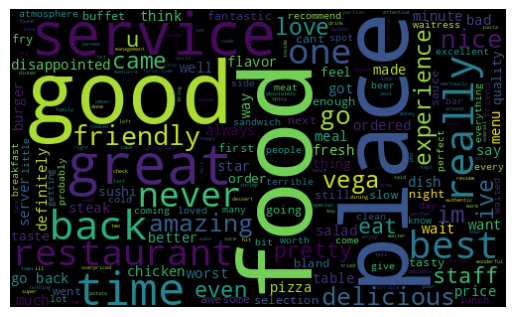

In [ ]:
all_messages = ' '.join(new_rev['Review'])
wordCloud = WordCloud(width=500, height=300, random_state=20, max_font_size=100).generate(all_messages)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##Frequent words in positive reviews

In [ ]:
liked_reviews = new_rev[new_rev['Liked'] == 1]['Review']
all_liked_messages = ' '.join(liked_reviews)

words = all_liked_messages.split()

word_counts = Counter(words)

most_common_words = word_counts.most_common(50)
print("Most Common Words in Liked Reviews:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most Common Words in Liked Reviews:
good: 73
great: 70
place: 60
food: 60
service: 46
time: 26
friendly: 23
delicious: 23
back: 23
nice: 22
really: 22
best: 22
amazing: 21
also: 18
like: 18
restaurant: 17
go: 17
love: 17
staff: 15
vega: 15
steak: 14
menu: 13
price: 13
first: 13
always: 12
fantastic: 12
experience: 12
pizza: 12
awesome: 12
pretty: 11
here: 11
made: 11
loved: 10
it: 10
selection: 10
chicken: 10
server: 10
definitely: 10
fresh: 10
one: 10
excellent: 10
even: 10
atmosphere: 10
perfect: 10
salad: 9
dish: 9
ever: 9
get: 9
im: 9
could: 8


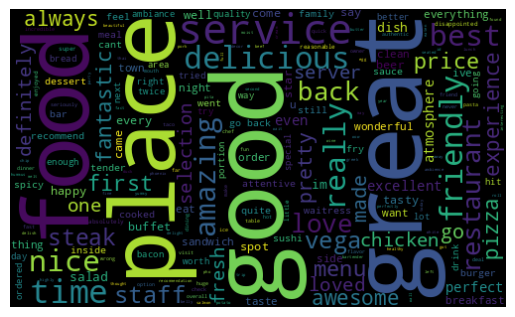

In [ ]:
liked_reviews = new_rev[new_rev['Liked'] == 1]['Review']
all_liked_messages = ' '.join(liked_reviews)

wordCloud = WordCloud(width=500, height=300, random_state=20, max_font_size=100).generate(all_liked_messages)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
negative_reviews = new_rev[new_rev['Liked'] == 0]['Review']
all_negative_messages = ' '.join(negative_reviews)

words = all_negative_messages.split()

word_counts = Counter(words)

most_common_words = word_counts.most_common(50)
print("Most Common Words in Negativw Reviews:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most Common Words in Negativw Reviews:
food: 65
place: 51
back: 38
service: 38
like: 29
time: 29
go: 26
good: 22
never: 22
would: 21
ever: 19
minute: 19
bad: 18
one: 17
much: 15
got: 15
really: 14
disappointed: 14
worst: 13
again: 13
think: 13
going: 13
ive: 13
it: 13
came: 12
eat: 12
u: 12
im: 12
slow: 11
get: 11
restaurant: 11
wait: 11
bland: 11
better: 11
table: 10
well: 10
way: 10
waited: 10
burger: 10
flavor: 10
probably: 10
star: 10
terrible: 10
say: 9
ordered: 9
also: 9
another: 9
even: 9
here: 9
could: 8


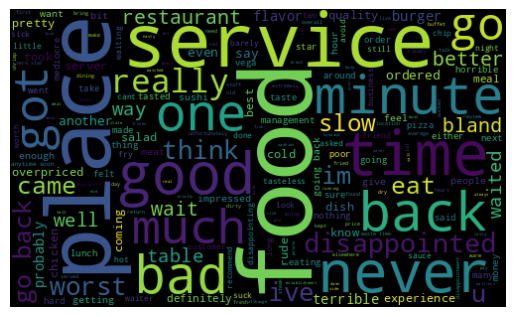

In [ ]:
liked_reviews = new_rev[new_rev['Liked'] == 0]['Review']
all_liked_messages = ' '.join(liked_reviews)

wordCloud = WordCloud(width=500, height=300, random_state=20, max_font_size=100).generate(all_liked_messages)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##N-grams anaysis

In [ ]:
X_string = X.str.cat(sep=' ')
X_string

'wow loved place crust good tasty texture nasty stopped late may bank holiday rick steve recommendation loved it selection menu great price getting angry want damn pho honeslty taste fresh potato like rubber could tell made ahead time kept warmer fry great too great touch service prompt would go back cashier care ever say still ended wayyy overpriced tried cape cod ravoli chicken cranberrymmmm disgusted pretty sure human hair shocked sign indicate cash only highly recommended waitress little slow service place worth time let alone vega like all burrittos blah food amazing service also cute could care le interior beautiful performed thats rightthe red velvet cakeohhh stuff good  never brought salad asked for hole wall great mexican street taco friendly staff took hour get food table restaurant food luke warm sever running around like totally overwhelmed worst salmon sashimi also combo like burger fry beer decent deal like final blow found place accident could happier seems like good qui

###Bigrams

In [ ]:
tokens = nltk.word_tokenize(X_string)

bigrams = list(nltk.ngrams(tokens, 2))
bigram_counts = Counter(bigrams)

most_common_bigrams = bigram_counts.most_common(50)
print("Most Common Bigrams:")
for bigram, count in most_common_bigrams:
    print(f"{bigram}: {count}")

Most Common Bigrams:
('go', 'back'): 18
('good', 'food'): 9
('great', 'food'): 8
('food', 'good'): 8
('going', 'back'): 7
('feel', 'like'): 6
('great', 'service'): 6
('really', 'good'): 6
('first', 'time'): 6
('great', 'place'): 6
('food', 'service'): 5
('customer', 'service'): 5
('food', 'delicious'): 5
('food', 'great'): 5
('anytime', 'soon'): 5
('friendly', 'staff'): 4
('bad', 'food'): 4
('back', 'again'): 4
('place', 'great'): 4
('never', 'ever'): 4
('again', 'food'): 4
('food', 'ever'): 4
('waste', 'time'): 4
('place', 'eat'): 4
('come', 'back'): 4
('zero', 'star'): 4
('good', 'service'): 4
('ever', 'go'): 4
('ive', 'ever'): 4
('service', 'food'): 4
('coming', 'back'): 4
('recommend', 'place'): 4
('another', 'minute'): 4
('would', 'recommend'): 4
('would', 'go'): 3
('slow', 'service'): 3
('service', 'also'): 3
('like', 'place'): 3
('good', 'price'): 3
('every', 'time'): 3
('server', 'great'): 3
('second', 'time'): 3
('sweet', 'potato'): 3
('pretty', 'good'): 3
('cant', 'wait'): 3


###Trigrams

In [ ]:
tokens = nltk.word_tokenize(X_string)

trigrams = list(nltk.ngrams(tokens, 3))
trigram_counts = Counter(trigrams)

most_common_trigrams = trigram_counts.most_common(20)
print("Most Common trigrams:")
for trigram, count in most_common_trigrams:
    print(f"{trigram}: {count}")

Most Common trigrams:
('going', 'back', 'anytime'): 3
('back', 'anytime', 'soon'): 3
('would', 'go', 'back'): 2
('running', 'around', 'like'): 2
('time', 'im', 'vega'): 2
('im', 'vega', 'place'): 2
('service', 'extremely', 'slow'): 2
('come', 'back', 'every'): 2
('good', 'thing', 'place'): 2
('give', 'zero', 'star'): 2
('cant', 'go', 'wrong'): 2
('never', 'ever', 'go'): 2
('ever', 'go', 'back'): 2
('food', 'ever', 'tasted'): 2
('first', 'vega', 'buffet'): 2
('great', 'place', 'eat'): 2
('anytime', 'soon', 'food'): 2
('would', 'much', 'rather'): 2
('would', 'recommend', 'place'): 2
('great', 'food', 'great'): 2


##Latent Dirichlet Allocation

LDA Topics:
Topic 1: 0.049*"service" + 0.022*"back" + 0.022*"great" + 0.020*"food" + 0.014*"friendly" + 0.013*"wo" + 0.012*"going" + 0.011*"also" + 0.011*"staff" + 0.010*"place"
Topic 2: 0.034*"food" + 0.027*"place" + 0.015*"like" + 0.014*"delicious" + 0.011*"best" + 0.010*"terrible" + 0.009*"really" + 0.008*"love" + 0.007*"want" + 0.007*"loved"
Topic 3: 0.013*"best" + 0.013*"worst" + 0.013*"ever" + 0.012*"service" + 0.011*"great" + 0.009*"waited" + 0.009*"like" + 0.008*"steak" + 0.008*"place" + 0.008*"pizza"
Topic 4: 0.017*"time" + 0.015*"food" + 0.013*"back" + 0.012*"got" + 0.009*"salad" + 0.009*"coming" + 0.009*"would" + 0.009*"definitely" + 0.009*"good" + 0.007*"like"
Topic 5: 0.016*"amazing" + 0.015*"would" + 0.012*"place" + 0.012*"food" + 0.010*"rude" + 0.009*"cold" + 0.009*"bad" + 0.008*"overall" + 0.007*"night" + 0.007*"delicious"
Topic 6: 0.060*"good" + 0.032*"food" + 0.017*"service" + 0.015*"time" + 0.014*"great" + 0.013*"place" + 0.011*"really" + 0.009*"one" + 0.009*"eat" + 

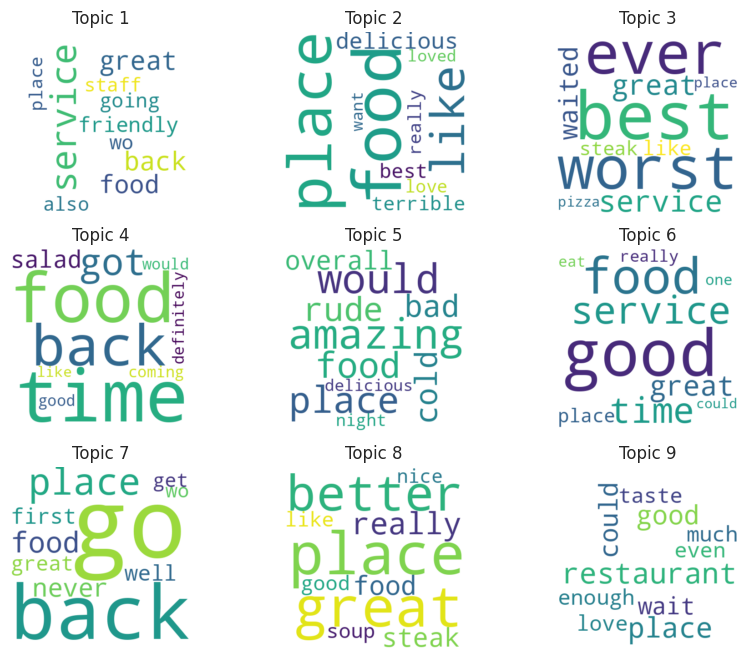

In [ ]:
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
stop_words = set(stopwords.words('english'))

rev['Tokenized_Review'] = rev['Review'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words])

dictionary = corpora.Dictionary(rev['Tokenized_Review'])
corpus = [dictionary.doc2bow(tokens) for tokens in rev['Tokenized_Review']]

lda_model = models.LdaModel(corpus, num_topics=9, id2word=dictionary, passes=15)

print("LDA Topics:")
for topic_id, words in lda_model.print_topics():
    print(f"Topic {topic_id + 1}: {words}")

coherence_model_lda = CoherenceModel(model=lda_model, texts=rev['Tokenized_Review'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print(f'\nCoherence Score: {coherence_lda}')

topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(3, 3, figsize=(10, 8), sharex=True, sharey=True)

for i, (ax, topic) in enumerate(zip(axes.flatten(), topics)):
    topic_words = dict(topic[1])
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(topic_words)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Topic {i + 1}')

plt.show()

#Testing some classification

In [ ]:
import torch
cuda_available = torch.cuda.is_available()

In [ ]:
rev= rev.drop(rev.columns[2], axis=1)
rev

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
rev_train=rev.iloc[:776, :]
rev_train

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
771,Great time - family dinner on a Sunday night.,1
772,"the food is not tasty at all, not to say its ""...",0
773,"What did bother me, was the slow service.",0
774,The flair bartenders are absolutely amazing!,1


In [ ]:
rev_test=rev.iloc[776:, :]
rev_test

,Review,Liked
776,These were so good we ordered them twice.,1
777,So in a nutshell: 1) The restaraunt smells lik...,0
778,My girlfriend's veal was very bad.,0
779,"Unfortunately, it was not good.",0
780,I had a pretty satifying experience.,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
n = 5
kf = KFold(n_splits=n, shuffle=True)
results = []

for train_index, val_index in kf.split(rev):
    rev_train = rev.iloc[train_index, :]
    rev_val = rev.iloc[val_index, :]
    rev_train.columns = ["Review", "Liked"]
    rev_val.columns = ["Review", "Liked"]
    model = ClassificationModel('bert', 'bert-base-uncased', use_cuda=False, args={'reprocess_input_data': True, 'overwrite_output_dir': True, 'num_train_epochs': 3})
    model.train_model(rev_train)
    result, _, _ = model.eval_model(rev_test, acc=accuracy_score)
    print(result['acc'])
    results.append(result['acc'])

print(results)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:611: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/800 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/224 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/28 [00:00<?, ?it/s]

0.96875


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:611: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text 

  0%|          | 0/800 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/224 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/28 [00:00<?, ?it/s]

0.9821428571428571


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:611: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text 

  0%|          | 0/800 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/224 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/28 [00:00<?, ?it/s]

0.9642857142857143


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:611: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text 

  0%|          | 0/800 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/224 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/28 [00:00<?, ?it/s]

0.9732142857142857


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:611: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text 

  0%|          | 0/800 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/224 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/28 [00:00<?, ?it/s]

0.9642857142857143
[0.96875, 0.9821428571428571, 0.9642857142857143, 0.9732142857142857, 0.9642857142857143]


In [ ]:
print("Mean accuracy with 3 epochs:", np.mean(results))

Mean accuracy with 3 epochs: 0.9705357142857143


##Keyword Extraction

In [ ]:
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(X)

feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

average_scores = tfidf_df.mean()

sorted_keywords = sorted(zip(feature_names, average_scores), key=lambda x: x[1], reverse=True)

print("\nMost Frequent Keywords and Their Average TF-IDF Scores:\n")
for keyword, score in sorted_keywords:
    print(f"{keyword}: {score:.4f}")


Most Frequent Keywords and Their Average TF-IDF Scores:

food: 0.0333
good: 0.0300
place: 0.0291
service: 0.0269
great: 0.0237
back: 0.0231
time: 0.0152
go: 0.0149
like: 0.0129
really: 0.0109
delicious: 0.0104
friendly: 0.0100
best: 0.0099
amazing: 0.0096
would: 0.0096
never: 0.0092
it: 0.0091
restaurant: 0.0090
ever: 0.0090
here: 0.0088
nice: 0.0085
one: 0.0085
also: 0.0085
experience: 0.0085
again: 0.0084
disappointed: 0.0081
pretty: 0.0073
love: 0.0071
im: 0.0071
bad: 0.0070
staff: 0.0068
definitely: 0.0068
star: 0.0066
price: 0.0066
ive: 0.0065
came: 0.0065
terrible: 0.0065
awesome: 0.0065
vega: 0.0064
going: 0.0064
pizza: 0.0064
say: 0.0063
think: 0.0062
eat: 0.0062
fantastic: 0.0062
better: 0.0061
get: 0.0060
well: 0.0060
worst: 0.0058
steak: 0.0058
first: 0.0058
way: 0.0058
minute: 0.0057
even: 0.0056
chicken: 0.0056
burger: 0.0056
much: 0.0056
server: 0.0056
salad: 0.0056
selection: 0.0055
got: 0.0055
atmosphere: 0.0054
dish: 0.0054
always: 0.0053
slow: 0.0051
menu: 0.0051
mad

 use text ranker:   https://www.analyticsvidhya.com/blog/2022/01/four-of-the-easiest-and-most-effective-methods-of-keyword-extraction-from-a-single-text-using-python/


In [ ]:
TR_keywords = keywords.keywords(X_string, scores=True)
print(TR_keywords[0:10])

[('placed', 0.320724250333585), ('service', 0.23367336132136513), ('loved place', 0.22382001574812854), ('food amazing', 0.2155950699918046), ('liked', 0.17641881008807853), ('liking', 0.17641881008807853), ('good tasty', 0.15658334853601108), ('love', 0.1269157811626721), ('loving', 0.1269157811626721), ('lovely', 0.1269157811626721)]


##Association rules for reviews

In [ ]:
!pip install apyori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=21658512897cb332fda57de8b95a1abf547cf9c33ec8d765a7c222cc599d909f
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from apyori import apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
reviews=new_rev['Review']
reviews=reviews.apply(tokenization)
reviews

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                                    [wow, loved, place]
1                                          [crust, good]
2                                [tasty, texture, nasty]
3      [stopped, late, may, bank, holiday, rick, stev...
4                        [selection, menu, great, price]
                             ...                        
995              [think, food, flavor, texture, lacking]
996                          [appetite, instantly, gone]
997                [overall, impressed, would, go, back]
998    [whole, experience, underwhelming, think, well...
999    [then, wasted, enough, life, there, poured, sa...
Name: Review, Length: 1000, dtype: object

In [ ]:
nested_list = reviews.tolist()
nested_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['wow', 'loved', 'place'],
 ['crust', 'good'],
 ['tasty', 'texture', 'nasty'],
 ['stopped',
  'late',
  'may',
  'bank',
  'holiday',
  'rick',
  'steve',
  'recommendation',
  'loved',
  'it'],
 ['selection', 'menu', 'great', 'price'],
 ['getting', 'angry', 'want', 'damn', 'pho'],
 ['honeslty', 'taste', 'fresh'],
 ['potato',
  'like',
  'rubber',
  'could',
  'tell',
  'made',
  'ahead',
  'time',
  'kept',
  'warmer'],
 ['fry', 'great', 'too'],
 ['great', 'touch'],
 ['service', 'prompt'],
 ['would', 'go', 'back'],
 ['cashier', 'care', 'ever', 'say', 'still', 'ended', 'wayyy', 'overpriced'],
 ['tried', 'cape', 'cod', 'ravoli', 'chicken', 'cranberrymmmm'],
 ['disgusted', 'pretty', 'sure', 'human', 'hair'],
 ['shocked', 'sign', 'indicate', 'cash', 'only'],
 ['highly', 'recommended'],
 ['waitress', 'little', 'slow', 'service'],
 ['place', 'worth', 'time', 'let', 'alone', 'vega'],
 ['like', 'all'],
 ['burrittos', 'blah'],
 ['food', 'amazing'],
 ['service', 'also', 'cute'],
 ['could', 'ca

In [ ]:
rules = apriori(nested_list, min_support=0.0022, min_confidence=0.20, min_lift=3, min_length = 4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
results = list(rules)
results_list = []
for i in range(0, len(results)):
    results_list.append('RULE:\t' + str(results[i][0]) + '\nSUPPORT:\t\t\t' + str(results[i][1]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(len(results_list))

172


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for result in results_list:
  print(result)

RULE:	frozenset({'again', 'back'})
SUPPORT:	0.005
RULE:	frozenset({'again', 'definitely'})
SUPPORT:	0.005
RULE:	frozenset({'go', 'again'})
SUPPORT:	0.005
RULE:	frozenset({'never', 'again'})
SUPPORT:	0.004
RULE:	frozenset({'ago', 'year'})
SUPPORT:	0.003
RULE:	frozenset({'all', 'food'})
SUPPORT:	0.003
RULE:	frozenset({'taste', 'also'})
SUPPORT:	0.003
RULE:	frozenset({'always', 'friendly'})
SUPPORT:	0.003
RULE:	frozenset({'always', 'great'})
SUPPORT:	0.004
RULE:	frozenset({'menu', 'always'})
SUPPORT:	0.003
RULE:	frozenset({'always', 'time'})
SUPPORT:	0.003
RULE:	frozenset({'minute', 'another'})
SUPPORT:	0.005
RULE:	frozenset({'anytime', 'back'})
SUPPORT:	0.004
RULE:	frozenset({'going', 'anytime'})
SUPPORT:	0.003
RULE:	frozenset({'anytime', 'soon'})
SUPPORT:	0.005
RULE:	frozenset({'area', 'place'})
SUPPORT:	0.003
RULE:	frozenset({'hour', 'around'})
SUPPORT:	0.003
RULE:	frozenset({'many', 'around'})
SUPPORT:	0.003
RULE:	frozenset({'atmosphere', 'great'})
SUPPORT:	0.003
RULE:	frozenset({'atm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Named Entity Recognition

In [ ]:
all_messages = ' '.join(rev['Review'])
all_messages

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Wow... Loved this place. Crust is not good. Not tasty and the texture was just nasty. Stopped by during the late May bank holiday off Rick Steve recommendation and loved it. The selection on the menu was great and so were the prices. Now I am getting angry and I want my damn pho. Honeslty it didn\'t taste THAT fresh.) The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer. The fries were great too. A great touch. Service was very prompt. Would not go back. The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced. I tried the Cape Cod ravoli, chicken, with cranberry...mmmm! I was disgusted because I was pretty sure that was human hair. I was shocked because no signs indicate cash only. Highly recommended. Waitress was a little slow in service. This place is not worth your time, let alone Vegas. did not like at all. The Burrittos Blah! The food, amazing. Service is also cute. I could care l

In [ ]:
import spacy
import requests
from bs4 import BeautifulSoup

nlp = spacy.load("en_core_web_sm")

pd.set_option("display.max_rows", 200)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
doc = nlp(all_messages)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Crust 25 30 ORG
Rick Steve 134 144 PERSON
Vegas 895 900 PERSON
The Burrittos Blah 923 941 PERSON
Mexican 1199 1206 NORP
an hour 1246 1253 TIME
only 4 1270 1276 CARDINAL
Luke 1310 1314 PERSON
23 1474 1476 CARDINAL
first 1943 1948 ORDINAL
Hiro 1958 1962 ORG
Frozen 2330 2336 PERSON
Firehouse 2595 2604 ORG
Greek 2618 2623 NORP
Greek 2639 2644 NORP
Vegas 3174 3179 GPE
5 3259 3260 CARDINAL
10 minutes 3538 3548 TIME
Dos Gringos! 3814 3826 GPE
second 3854 3860 ORDINAL
5 4047 4048 CARDINAL
2 4062 4063 CARDINAL
Jeff 4076 4080 PERSON
over 30 4192 4199 CARDINAL
Excalibur 4356 4365 ORG
2 4456 4457 CARDINAL
Today 4551 4556 DATE
second 4564 4570 ORDINAL
Vegas 4662 4667 GPE
Rice 4734 4738 PERSON
only 2 4946 4952 CARDINAL
six year old 5128 5140 DATE
Pho 5153 5156 PERSON
Hard Rock Casino 5582 5598 LOC
WILL NEVER 5607 5617 PERSON
Tigerlilly 6313 6323 PERSON
afternoon 6344 6353 TIME
Sooooo 6529 6535 GPE
At least 40min 6603 6617 CARDINAL
us 6636 6638 GPE
Thai 6723 6727 NORP
Indian 7139 7145 NORP
Bland 7572

In [ ]:
entities = [(ent.text, ent.label_, ent.lemma_) for ent in doc.ents]
df = pd.DataFrame(entities, columns=['text', 'type', 'lemma'])
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,type,lemma
0,Crust,ORG,crust
1,Rick Steve,PERSON,Rick Steve
2,Vegas,PERSON,Vegas
3,The Burrittos Blah,PERSON,the Burrittos Blah
4,Mexican,NORP,mexican
...,...,...,...
356,11.99,MONEY,11.99
357,only 1/2,QUANTITY,only 1/2
358,Brushfire,GPE,Brushfire
359,Mirage,ORG,Mirage


In [ ]:
df[df.type == 'GPE'].lemma.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Vegas           16
Phoenix          3
Carly            1
Denny            1
Albondigas       1
Hunan            1
Edinburgh        1
Philadelphia     1
Noca             1
Las Vegas        1
Aria             1
Dos Gringos!     1
Tucson           1
Thai             1
Bachi            1
yelper           1
Great Subway     1
we               1
Sooooo           1
Brushfire        1
Name: lemma, dtype: int64

In [ ]:
df[df.type == 'PERSON'].lemma.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Vegas                 3
Pho                   3
Bland                 2
Lobster Bisque        2
Rick Steve            1
Dessert               1
Waiter                1
strike 2              1
Mom                   1
Bloody Mary           1
macaron               1
LEGIT                 1
baklava               1
Baba Ganoush          1
Smashburger           1
damn                  1
Panna Cotta           1
bland                 1
hawaiian Breeze       1
Pineapple Delight     1
Dylan T.              1
Ryan                  1
level 5               1
Maria                 1
BARE hand             1
Gyros                 1
strawberry            1
Del Taco              1
outstanding           1
Ironman               1
Gordon Ramsey's       1
restaurant            1
the Burrittos Blah    1
Luke                  1
frozen                1
Jeff                  1
Rice                  1
will never            1
Tigerlilly            1
Lox                   1
Crostini              1
Voodoo          

In [ ]:
df[df.type == 'ORG'].lemma.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


best                               3
FLY                                2
Sat                                1
Sun                                1
GC                                 1
Palm                               1
Toast                              1
NASTY                              1
the food & the guy                 1
MGM                                1
Nobu                               1
Google                             1
Strip Steak                        1
the Elk Filet                      1
crust                              1
Hiro                               1
Friend                             1
FANTASTIC                          1
the Hot & Sour &                   1
way                                1
Wienerschnitzel                    1
Maine Lobster Roll                 1
Caballero                          1
Costco                             1
the Mediterranean Chicken Salad    1
weak                               1
should                             1
H

In [ ]:
df[df.type == 'NORP'].lemma.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Thai                 3
Greek                3
mexican              2
indian               2
chinese              2
italian              2
Caesar               1
WAAAAAAyyyyyyyyyy    1
Mmmm                 1
japanese             1
Frenchman            1
thai                 1
Ians                 1
Vegas                1
veggitarian          1
jamaican             1
vegetarian           1
Name: lemma, dtype: int64

In [ ]:
df[df.type == 'TIME'].lemma.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


an hour                3
20 minute              3
last night             2
40 minute              2
another 35 minute      1
all night              1
night                  1
over 30 minute         1
tonight                1
half an hour           1
another 30 minute      1
another 15 minute      1
thirty minute          1
45 minute              1
another 10 minute      1
10 minute              1
hour                   1
the first 10 minute    1
another ten minute     1
2 hour                 1
30 minute              1
about 10 minute        1
an off night           1
forty five minute      1
afternoon              1
35 minute              1
Name: lemma, dtype: int64

##Review filtering

In [ ]:
burger_df = rev[rev['Review'].apply(lambda x: 'burger' in tokenization(x))]

print("Result DataFrame:")
burger_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
47,"The burger is good beef, cooked just right.",1
180,The burger had absolutely no flavor - the meat...,0
296,Before I go in to why I gave a 1 star rating p...,0
337,"The burger... I got the ""Gold Standard"" a $17 ...",0
475,"Third, the cheese on my friend's burger was cold.",0
634,Ordered burger rare came in we'll done.,0
651,Great place to relax and have an awesome burge...,1


burger-bland, cold, overcooked

In [ ]:
steak_df = rev[rev['Review'].apply(lambda x: 'steak' in tokenization(x))]

print("Result DataFrame:")
steak_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
118,Kind of hard to mess up a steak but they did.,0
123,"The guys all had steaks, and our steak loving ...",1
449,My ribeye steak was cooked perfectly and had g...,1
498,Their monster chicken fried steak and eggs is ...,1
539,The steak and the shrimp are in my opinion the...,1
688,The steak was amazing...rge fillet relleno was...,1


In [ ]:
pizza_df = rev[rev['Review'].apply(lambda x: 'pizza' in tokenization(x))]

print("Result DataFrame:")
pizza_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
254,Now the pizza itself was good the peanut sauce...,1
397,Kids pizza is always a hit too with lots of gr...,1
426,This is some seriously good pizza and I'm an e...,1
433,Ordered an appetizer and took 40 minutes and t...,0
476,We enjoy their pizza and brunch.,1
575,"The pizza tasted old, super chewy in not a goo...",0
715,Only Pros : Large seating area/ Nice bar area/...,1
879,"Now the burgers aren't as good, the pizza whic...",0
896,The pizza selections are good.,1
968,We've have gotten a much better service from t...,0


In [ ]:
chicken_df = rev[rev['Review'].apply(lambda x: 'chicken' in tokenization(x))]

print("Result DataFrame:")
chicken_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
86,The poor batter to meat ratio made the chicken...,0
132,They have a good selection of food including a...,1
455,The chicken wings contained the driest chicken...,0
498,Their monster chicken fried steak and eggs is ...,1
612,The chicken I got was definitely reheated and ...,0
620,I had the chicken Pho and it tasted very bland.,0
622,The grilled chicken was so tender and yellow f...,1
627,Any grandmother can make a roasted chicken bet...,0
633,High-quality chicken on the chicken Caesar salad.,1
721,The chicken was deliciously seasoned and had t...,1


chicken - dry, undercooked, unbalanced

In [ ]:
salad_df = rev[rev['Review'].apply(lambda x: 'salad' in tokenization(x))]

print("Result DataFrame:")
salad_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
26,- They never brought a salad we asked for.,0
49,My side Greek salad with the Greek dressing wa...,1
58,The salad had just the right amount of sauce t...,1
153,Crostini that came with the salad was stale.,0
193,"I had a salad with the wings, and some ice cre...",1
211,"For about 10 minutes, we we're waiting for her...",0
279,I had the mac salad and it was pretty bland so...,0
560,My salad had a bland vinegrette on the baby gr...,0


salad-bland, high wait time

In [ ]:
pho_df = rev[rev['Review'].apply(lambda x: 'Pho' in tokenization(x))]

print("Result DataFrame:")
pho_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
85,I love the Pho and the spring rolls oh so yumm...,1
620,I had the chicken Pho and it tasted very bland.,0


In [ ]:
service_df = rev[rev['Review'].apply(lambda x: 'service' in tokenization(x))]

print("Result DataFrame:")
service_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
72,The service was meh.,0
121,"Worst service to boot, but that is the least o...",0
127,"Phenomenal food, service and ambiance.",1
146,"The menu is always changing, food quality is g...",0
147,"The service was a little slow , considering th...",0
176,The service here leaves a lot to be desired.,0
221,The service was a bit lacking.,0
249,Based on the sub-par service I received and no...,0
255,We had 7 at our table and the service was pret...,1
256,Fantastic service here.,1


In [ ]:
staff_df = rev[rev['Review'].apply(lambda x: 'staff' in tokenization(x))]

print("Result DataFrame:")
staff_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
125,"Host staff were, for lack of a better word, BI...",0
155,the staff is friendly and the joint is always ...,1
292,"The staff is great, the food is delish, and th...",1
355,"On the good side, the staff was genuinely plea...",1
368,"The staff are great, the ambiance is great.",1
379,"The staff are now not as friendly, the wait ti...",0
578,The staff are also very friendly and efficient.,1
629,The staff is always super friendly and helpful...,1
662,The owners are super friendly and the staff is...,1
666,The staff was very attentive.,1


In [ ]:
ambiance_df = rev[rev['Review'].apply(lambda x: 'ambiance' in tokenization(x))]

print("Result DataFrame:")
ambiance_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
368,"The staff are great, the ambiance is great.",1
503,The ambiance was incredible.,1
952,The ambiance here did not feel like a buffet s...,0
971,The ambiance isn't much better.,0


In [ ]:
atmosphere_df = rev[rev['Review'].apply(lambda x: 'atmosphere' in tokenization(x))]

print("Result DataFrame:")
atmosphere_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
177,"The atmosphere is modern and hip, while mainta...",1
262,The restaurant atmosphere was exquisite.,1
398,Service is perfect and the family atmosphere i...,1
659,The atmosphere was great with a lovely duo of ...,1
706,The atmosphere here is fun.,1


In [ ]:
management_df = rev[rev['Review'].apply(lambda x: 'management' in tokenization(x))]

print("Result DataFrame:")
management_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
133,The management is rude.,0
571,We recently witnessed her poor quality of mana...,0
748,"I have watched their prices inflate, portions ...",0


In [ ]:
price_df = rev[rev['Review'].apply(lambda x: 'price' in tokenization(x))]

print("Result DataFrame:")
price_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
102,"Best Buffet in town, for the price you cannot ...",1
699,"Anyways, The food was definitely not filling a...",0
827,For that price I can think of a few place I wo...,0
853,The price is reasonable and the service is great.,1


In [ ]:
portion_df = rev[rev['Review'].apply(lambda x: 'portion' in tokenization(x))]

print("Result DataFrame:")
portion_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
54,The portion was huge!,1


In [ ]:
music_df = rev[rev['Review'].apply(lambda x: 'music' in tokenization(x))]

print("Result DataFrame:")
music_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
107,The ambience is wonderful and there is music p...,1
196,The live music on Fridays totally blows.,0
687,"The decor is nice, and the piano music soundtr...",1


In [ ]:
decor_df = rev[rev['Review'].apply(lambda x: 'decor' in tokenization(x))]

print("Result DataFrame:")
decor_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
687,"The decor is nice, and the piano music soundtr...",1
738,I love the decor with the Chinese calligraphy ...,1


In [ ]:
wh_df = rev[rev['Review'].apply(lambda x: 'hours' in tokenization(x))]

print("Result DataFrame:")
wh_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
290,Waited 2 hours & never got either of our pizza...,0
422,"Furthermore, you can't even find hours of oper...",0


In [ ]:
clean_df = rev[rev['Review'].apply(lambda x: 'clean' in tokenization(x))]

print("Result DataFrame:")
clean_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
145,The bathrooms are clean and the place itself i...,1
585,Great food and great service in a clean and fr...,1
740,The restaurant is very clean and has a family ...,1
761,The place was not clean and the food oh so stale!,0
934,The place was fairly clean but the food simply...,0


In [ ]:
vegas_df = rev[rev['Review'].apply(lambda x: 'Vegas' in tokenization(x))]

print("Result DataFrame:")
vegas_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
56,The Heart Attack Grill in downtown Vegas is an...,0
79,There is so much good food in Vegas that I fee...,0
171,This really is how Vegas fine dining used to b...,1
393,We walked away stuffed and happy about our fir...,1
394,Service was excellent and prices are pretty re...,1
469,This was my first and only Vegas buffet and it...,1
532,The best place in Vegas for breakfast (just ch...,1
549,My boyfriend and I came here for the first tim...,1
894,If you stay in Vegas you must get breakfast he...,1
909,This is my new fav Vegas buffet spot.,1


In [ ]:
ph_df = rev[rev['Review'].apply(lambda x: 'Phoenix' in tokenization(x))]

print("Result DataFrame:")
ph_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
166,This place is hands-down one of the best place...,1
194,I'm not really sure how Joey's was voted best ...,0
766,One of the few places in Phoenix that I would ...,1


In [ ]:
r_df = rev[rev['Review'].apply(lambda x: 'Maria' in tokenization(x))]

print("Result DataFrame:")
r_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
833,"Best service and food ever, Maria our server w...",1


In [ ]:
l_df = rev[rev['Review'].apply(lambda x: 'Luke' in tokenization(x))]

print("Result DataFrame:")
l_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
28,Took an hour to get our food only 4 tables in ...,0


In [ ]:
j_df = rev[rev['Review'].apply(lambda x: 'Jeff' in tokenization(x))]

print("Result DataFrame:")
j_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
70,"The deal included 5 tastings and 2 drinks, and...",1


In [ ]:
o_df = rev[rev['Review'].apply(lambda x: 'Otto' in tokenization(x))]

print("Result DataFrame:")
o_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
227,The folks at Otto always make us feel so welco...,1


In [ ]:
rick_df = rev[rev['Review'].apply(lambda x: 'Rick' in tokenization(x))]

print("Result DataFrame:")
rick_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
3,Stopped by during the late May bank holiday of...,1


In [ ]:
go_df = rev[rev['Review'].apply(lambda x: 'Gordon' in tokenization(x))]

print("Result DataFrame:")
go_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
356,"Sadly, Gordon Ramsey's Steak is a place we sha...",0


In [ ]:
ba_df = rev[rev['Review'].apply(lambda x: 'Bachi' in tokenization(x))]

print("Result DataFrame:")
ba_df[['Review', 'Liked']]

Result DataFrame:


,Review,Liked
280,I went to Bachi Burger on a friend's recommend...,1
296,Before I go in to why I gave a 1 star rating p...,0
